In [60]:
# Importing all the packages needed for this project.

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import make_pipeline
from sklearn.mixture import GaussianMixture
from sklearn.compose import make_column_transformer

from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

In [61]:
url = 'https://raw.githubusercontent.com/min-is/Chapman-University/main/CPSC%20392%20-%20Data%20Science/Final%20Project/high_diamond_ranked_10min.csv'

df = pd.read_csv(url)

df.head()

# The above code is reading the csv file from the url and storing it in a dataframe called df.

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [62]:
# Counting the missing data per column


null = df.isnull().sum()
null_preDF = {'Number of Missing Datapoints': null}
nullDF = pd.DataFrame(null_preDF)

nullDF

# The above code is creating a dataframe that shows the number of missing datapoints for each column.

,Number of Missing Datapoints
gameId,0
blueWins,0
blueWardsPlaced,0
blueWardsDestroyed,0
blueFirstBlood,0
blueKills,0
blueDeaths,0
blueAssists,0
blueEliteMonsters,0
blueDragons,0


In [63]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

# Question 1. 
### When predicting if blue team won, which model (Linear Regression, Logistic Regression, Decision Trees, K-Nearest Neighbors) had the highest accuracy?

In [64]:
# Linear Regression

# all variables in the dataset
predictors = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 
'blueAssists', 'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 
'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 
'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 
'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds', 
'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 
'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

# all continuous/interval variables in the data
contin = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueKills', 'blueDeaths', 'blueAssists', 
'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 
'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 
'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 
'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed', 
'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 
'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

X = df[predictors]
y = df['blueWins']

# TTS with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df["blueWins"], test_size = 0.2)

z = StandardScaler()
X_train[contin] = z.fit_transform(X_train[contin])
X_test[contin] = z.transform(X_test[contin])

linear = LinearRegression()
linReg = linear.fit(X_train, y_train)

print('The R2 value for the train set is :', linReg.score(X_train, y_train))
print('The R2 value for the test set is :', linReg.score(X_test, y_test))


The R2 value for the train set is : 0.2829870153819123
The R2 value for the test set is : 0.27134941379446753


The accuracy for Logistic Regression is:  0.7267206477732794


c:\Users\Isaac Min\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
c:\Users\Isaac Min\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names


Text(0.5, 1.0, 'Confusion matrix of the classifier')

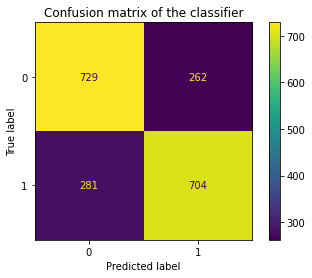

In [65]:
# Logistic Regression

X = df[predictors]
y = df['blueWins']

# TTS with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df["blueWins"], test_size = 0.2)

z = StandardScaler()
z.fit(X_train)
Xz_train = z.transform(X_train)
Xz_test = z.transform(X_test)

logR = LogisticRegression()

logR.fit(Xz_train,y_train)

predictedVals = logR.predict(Xz_test)

print('The accuracy for Logistic Regression is: ', accuracy_score(y_test, predictedVals))

logistic_regression = accuracy_score(y_test, predictedVals)

plot_confusion_matrix(logR, X_test, y_test)
plt.title('Confusion matrix of the classifier')

Accuracy for our training dataset with tuning is :  0.7288371504491965
Accuracy for our test dataset with tuning is :  0.7115384615384616
The best max_depth value was found to be:  1


c:\Users\Isaac Min\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
c:\Users\Isaac Min\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


Text(0.5, 1.0, 'Confusion Matrix for Test Set')

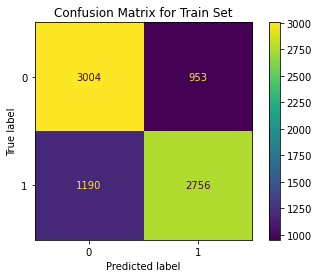

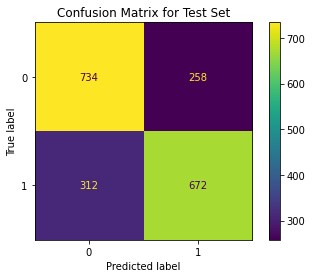

In [66]:
# Decision Tree

X = df[predictors]
y = df['blueWins']

# TTS with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df["blueWins"], test_size = 0.2)

z = make_column_transformer((StandardScaler(), contin))

tree = DecisionTreeClassifier()

pipe = make_pipeline(z, tree)

pipe.get_params().keys()

depths = {"decisiontreeclassifier__max_depth": range(1,20)}

gridDT = GridSearchCV(pipe, depths, scoring = 'accuracy', cv = 10, refit = True)

dtmod = gridDT.fit(X_train, y_train)

print('Accuracy for our training dataset with tuning is : ', dtmod.score(X_train, y_train))
print('Accuracy for our test dataset with tuning is : ', dtmod.score(X_test, y_test))

print('The best max_depth value was found to be: ', dtmod.best_estimator_.get_params()['decisiontreeclassifier__max_depth'])

decision_tree = dtmod.score(X_test, y_test)

plot_confusion_matrix(dtmod, X_train, y_train)
plt.title('Confusion Matrix for Train Set')

plot_confusion_matrix(dtmod, X_test, y_test)
plt.title('Confusion Matrix for Test Set')


Accuracy for our training dataset with tuning is :  0.7397190940149311
Accuracy for our test dataset with tuning is :  0.7115384615384616
The best k value was found to be:  38


c:\Users\Isaac Min\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
c:\Users\Isaac Min\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


Text(0.5, 1.0, 'Confusion Matrix for Test Set')

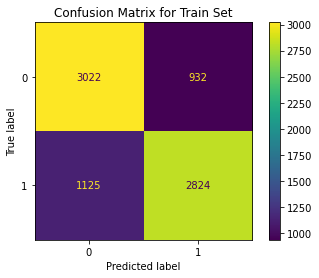

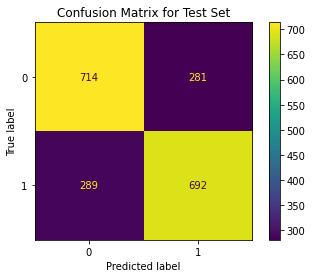

In [67]:
# K-Nearest Neighbors

X = df[predictors]
y = df['blueWins']

# TTS with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df["blueWins"], test_size = 0.2)

knn = KNeighborsClassifier()

z = make_column_transformer((StandardScaler(), contin))

pipe = make_pipeline(z, knn)

pipe.get_params().keys()

ks = {'kneighborsclassifier__n_neighbors': range(1,50)}

gridKNN = GridSearchCV(pipe, ks, scoring = 'accuracy', cv = 10, refit = True)

knnmod = gridKNN.fit(X_train, y_train)

# finding the accuracy of the training/test datasets
print('Accuracy for our training dataset with tuning is : ', knnmod.score(X_train, y_train))
print('Accuracy for our test dataset with tuning is : ', knnmod.score(X_test, y_test))

# getting the k value used for the KNN model
print('The best k value was found to be: ', knnmod.best_estimator_.get_params()['kneighborsclassifier__n_neighbors'])

k_nearest_neighbors = knnmod.score(X_test, y_test)

# plotting the confusion matrices
plot_confusion_matrix(knnmod, X_train, y_train)
plt.title('Confusion Matrix for Train Set')

plot_confusion_matrix(knnmod, X_test, y_test)
plt.title('Confusion Matrix for Test Set')


In [68]:
Model = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors']
Accuracy = [logistic_regression, decision_tree, k_nearest_neighbors]

toAccDF = {'Model': Model, 'Accuracy': Accuracy}

accDF = pd.DataFrame(toAccDF)

accDF

,Model,Accuracy
0,Logistic Regression,0.726721
1,Decision Tree,0.711538
2,K-Nearest Neighbors,0.711538


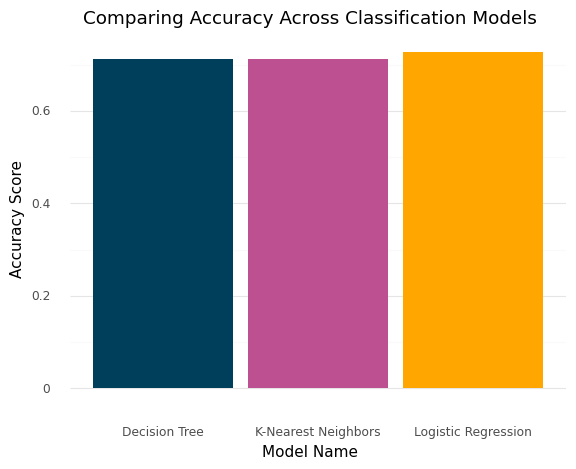

<ggplot: (107436842177)>

In [69]:
(ggplot(accDF, aes(x = 'Model', y = 'Accuracy')) + geom_bar(aes(fill = 'Model'), stat = 'identity') +
 theme_bw() + ggtitle('Comparing Accuracy Across Classification Models') + theme_minimal() + 
 theme(panel_grid_major_x = element_blank(), panel_grid_minor_x = element_blank(), legend_position = 'none') + 
 labs(x = 'Model Name', y = 'Accuracy Score') + scale_fill_manual(["#003f5c", "#bc5090", "#ffa600"]))

### 1. 

A models using linear regression, logistic regression, decision tree, and k-nearest neighbors were constructed using all of the features available in the dataset. Explicit accuracy scores for linear regression were not obtained because this metric is only valid for classifcation models (logistic regression, decision tree, and k-nearest neighbors). Instead, the R2 value was calculated in lieu of the accuracy score.

The linear regression model had a R2 score (coefficient of determination) of 0.271. A R2 (r-squared) score is a mesasure of how close the datapoints are to the fitted regression line. The model's R2 score indicates the model explains 27.1% of the variablity of the response data around its mean. An R2 score of 1 would indicate a perfect predictive accuracy. Because this investigation was interested in calculating the accuracy of the blue team winning, creating a linear regression model may not have been most ideal. Classifcation models such as those using logistic regression, decision tree, etc. would be more appropriate.

The logistic regression model performed fairly well, with an accuracy score of approximately 0.727. A confusion matrix plot was created to see how exactly how many number of game outcomes the model was able to predict correctly using the given data. The plot had high counts in the upper left and lower right cells (729 and 704, respectively) for the test set, reiterating the notion that the model was relatively accurate.

Similarly, the decision tree model also performed well, with an accuracy score of approximately 0.712. Another confusion matrix plot was created; the results were similar to that of the logistic regression model — there were high counts in the upper left and lower right cells (734 and 672, respectively). These metrics indicate that while lower in accuracy than that of logisic regression, the model was still fairly accurate.

The k-nearest neighbors model also had similar peformance to the logistic regression and decision tree model. The accuracy score of the model was approximately 0.712, performing nearly the same as the decision tree model. The confusion matrix also supported this notion, with high counts in the upper left and lower right cells (714 and 692, respectively). Although this was lower than that of the logistic regression model, it was close in accuracy indicating that this model also performed very with the dataset.

The accuracy scores of all of the models (excluding linear regression) was stored in a separate dataframe and plotted in a bar graph to visualize the difference in accuracy. After constructing this bar graph, I found that differences in accuracy were negligible, with only logistic regression providing a slightly higher accuracy. All of the classifcation models displayed a strong performance, with relatively high accuracy scores and similar confusion matrices. However, the highest performing model was the Logistic Regression model.


# Question 2. 
### Is total experience related to the total gold (for both blue and red teams)? 

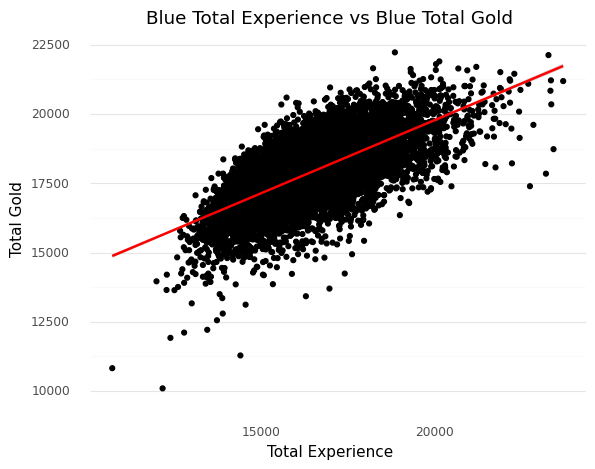

<ggplot: (107439645986)>

In [70]:
df1 = df[['blueTotalGold', 'blueTotalExperience', 'redTotalGold', 'redTotalExperience']].copy()

(ggplot(df1, aes(x = 'blueTotalGold', y = 'blueTotalExperience')) + geom_point() + 
geom_smooth(method = 'lm', color = 'red') + theme_bw() + ggtitle('Blue Total Experience vs Blue Total Gold') 
+ theme_minimal() + theme(panel_grid_major_x = element_blank(), panel_grid_minor_x = element_blank(), 
legend_position = 'none') + labs(x = 'Total Experience', y = 'Total Gold'))

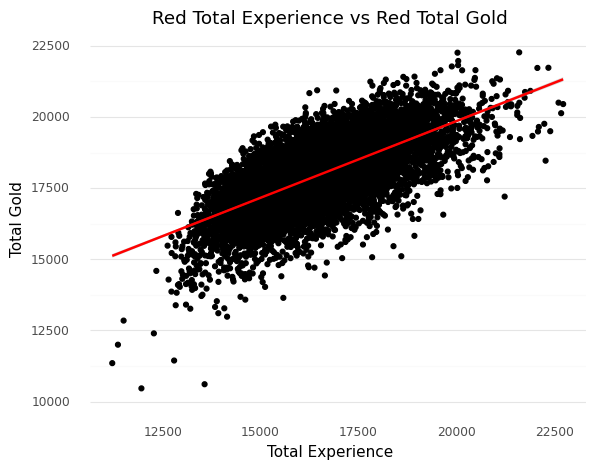

<ggplot: (107439795517)>

In [71]:
(ggplot(df1, aes(x = 'redTotalGold', y = 'redTotalExperience')) + geom_point() + 
geom_smooth(method = 'lm', color = 'red') + theme_bw() + ggtitle('Red Total Experience vs Red Total Gold') + 
theme_minimal() + theme(panel_grid_major_x = element_blank(), panel_grid_minor_x = element_blank(), 
legend_position = 'none') + labs(x = 'Total Experience', y = 'Total Gold'))

### 2. 
When creating scatterplots to evaluate their relationship, I found that the total experience and total gold for both the blue and red team had a positive correlation. In general, the more experience a team had, the more gold they had as well. Creating a regression line through the plots reiterates this positive relationship. 

# Question 3
### With total minions killed, total experience, and total kills in consideration, what clusters emerge and what are the characteristics of these clusters? 

In [72]:
df2 = df[['blueTotalMinionsKilled', 'blueTotalExperience', 'blueKills', 'redTotalMinionsKilled', 
'redTotalExperience', 'redKills']]

df2.head()

,blueTotalMinionsKilled,blueTotalExperience,blueKills,redTotalMinionsKilled,redTotalExperience,redKills
0,195,17039,9,197,17047,6
1,174,16265,5,240,17438,5
2,186,16221,7,203,17254,11
3,201,17954,4,235,17961,5
4,210,18543,6,225,18313,6


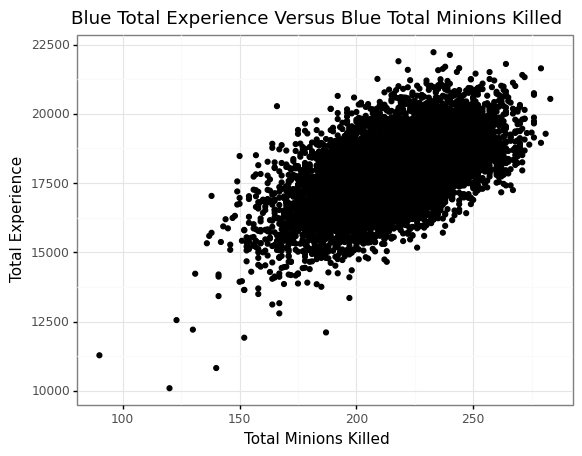

<ggplot: (107430932571)>

In [73]:
(ggplot(df2, aes(x = 'blueTotalMinionsKilled', y = 'blueTotalExperience')) + geom_point() + 
theme_minimal() + theme_bw() + ggtitle('Blue Total Experience Versus Blue Total Minions Killed') + 
labs(x = 'Total Minions Killed', y = 'Total Experience'))

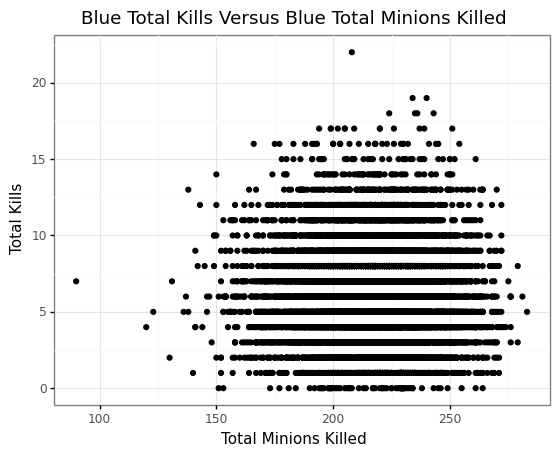

<ggplot: (107439646016)>

In [74]:
(ggplot(df2, aes(x = 'blueTotalMinionsKilled', y = 'blueKills')) + geom_point() + 
theme_minimal() + theme_bw() + ggtitle('Blue Total Kills Versus Blue Total Minions Killed') + 
labs(x = 'Total Minions Killed', y = 'Total Kills'))

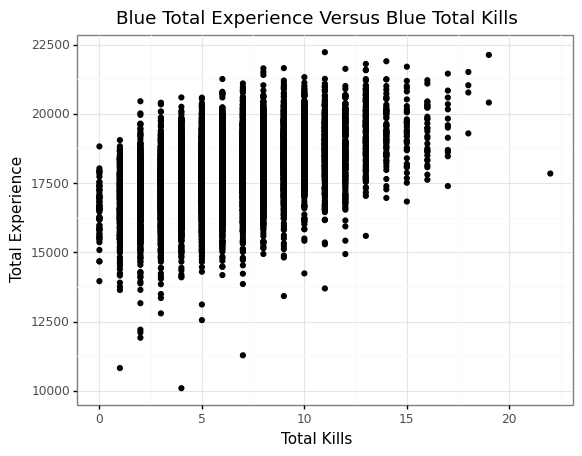

<ggplot: (107441207751)>

In [75]:
(ggplot(df2, aes(x = 'blueKills', y = 'blueTotalExperience')) + geom_point() + 
theme_minimal() + theme_bw() + ggtitle('Blue Total Experience Versus Blue Total Kills') + 
labs(x = 'Total Kills', y = 'Total Experience'))

C:\Users\Isaac Min\AppData\Local\Temp\ipykernel_11920\2275031061.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[0.3015133621076604, 0.2829851484502197, 0.25512951865979105, 0.2589733742741076, 0.2377143907450277, 0.2354421074713215, 0.2136916364560163, 0.2353408897566076, 0.22064797459641539, 0.21652356682059934, 0.22148672710507017, 0.21177494327200805, 0.20930974384675363]


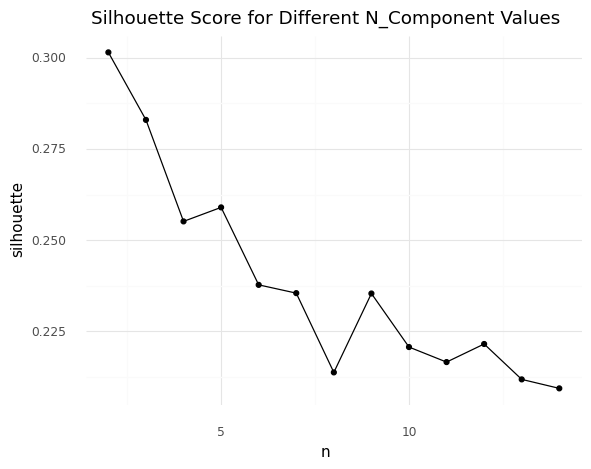

<ggplot: (107439741706)>

In [76]:
features = ['blueTotalMinionsKilled', 'blueTotalExperience', 'blueKills']

X = df2[features]

# z-scoring
z = StandardScaler()
X[features] = z.fit_transform(X)
Xdf = X

# finding the best n_components value
sils = []
n_components = [2,3,4,5,6,7,8,9,10,11,12,13,14]

for n in n_components:
    gmm = GaussianMixture(n_components = n)
    gmm.fit(X)
    pred = gmm.predict(X)

    sils.append(silhouette_score(X, pred))

print(sils)

# saving silhouette scores and n_components to dataframe 
sils_df = pd.DataFrame({"n": n_components,
                      "silhouette": sils})

#plot
(ggplot(sils_df, aes(x = "n", y = "silhouette")) + geom_point() + geom_line() + 
theme_minimal() + labs(title = "Silhouette Score for Different N_Component Values"))

In [77]:
EM = GaussianMixture(n_components = 2)
EM.fit(X)

EMcluster = EM.predict(X)
X['EM_Clusters'] = EMcluster
print(silhouette_score(X, EMcluster))

C:\Users\Isaac Min\AppData\Local\Temp\ipykernel_11920\146242162.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.36315844928434365


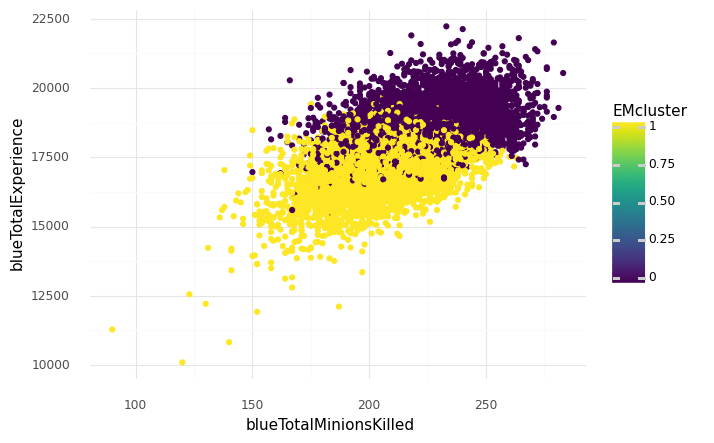

<ggplot: (107443965100)>

In [78]:
(ggplot(df2, aes(x = 'blueTotalMinionsKilled', y = 'blueTotalExperience', color = 'EMcluster')) 
+ geom_point() + theme_minimal())


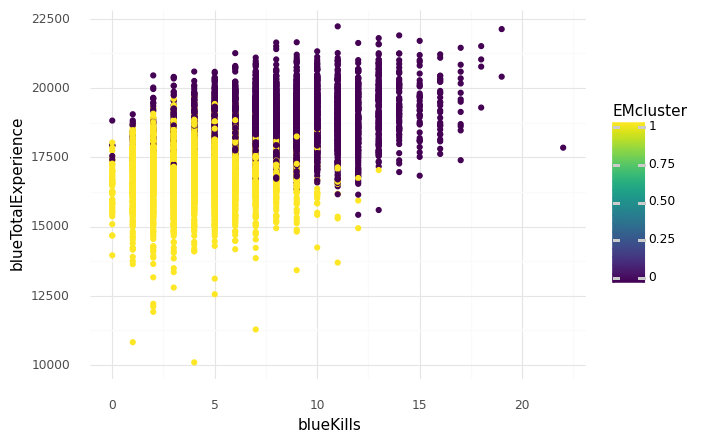

<ggplot: (107443970789)>

In [79]:
(ggplot(df2, aes(x= 'blueKills', y= 'blueTotalExperience', color = 'EMcluster')) 
+ geom_point() + theme_minimal())


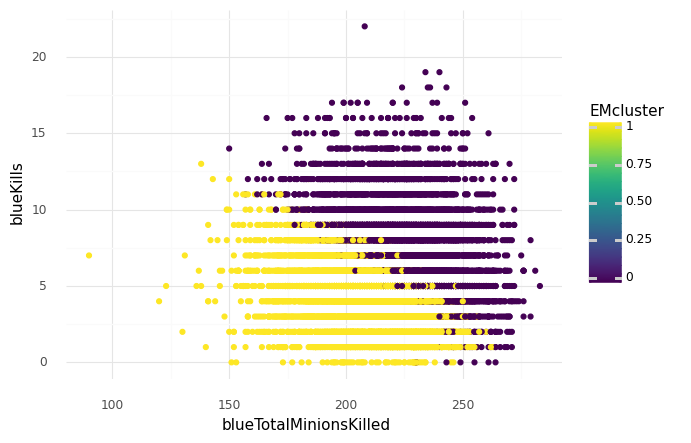

<ggplot: (107443690060)>

In [80]:
(ggplot(df2, aes(x = 'blueTotalMinionsKilled', y = 'blueKills', color = 'EMcluster')) 
+ geom_point() + theme_minimal())


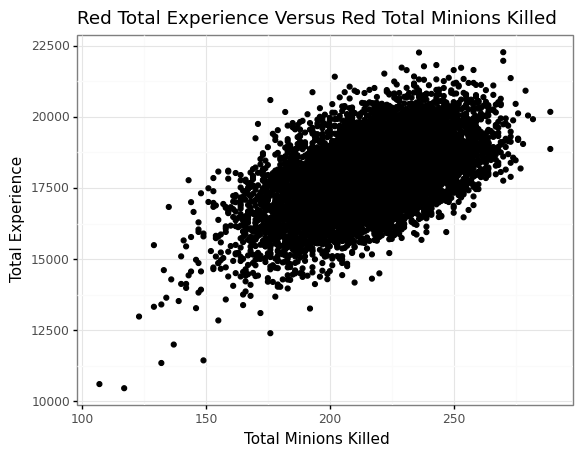

<ggplot: (107444134419)>

In [81]:
(ggplot(df2, aes(x = 'redTotalMinionsKilled', y = 'redTotalExperience')) + geom_point() + 
theme_minimal() + theme_bw() + ggtitle('Red Total Experience Versus Red Total Minions Killed') + 
labs(x = 'Total Minions Killed', y = 'Total Experience'))

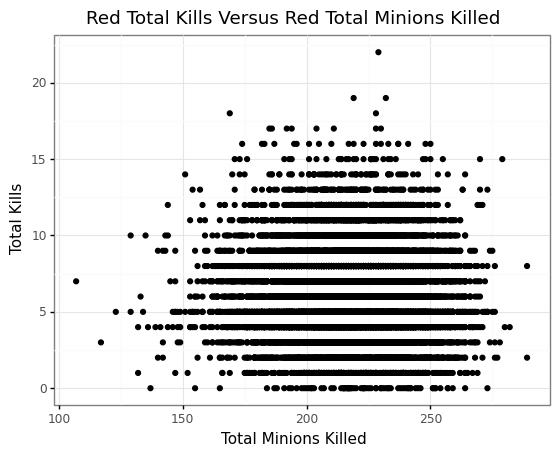

<ggplot: (107444160537)>

In [82]:
(ggplot(df2, aes(x = 'redTotalMinionsKilled', y = 'redKills')) + geom_point() + 
theme_minimal() + theme_bw() + ggtitle('Red Total Kills Versus Red Total Minions Killed') + 
labs(x = 'Total Minions Killed', y = 'Total Kills'))

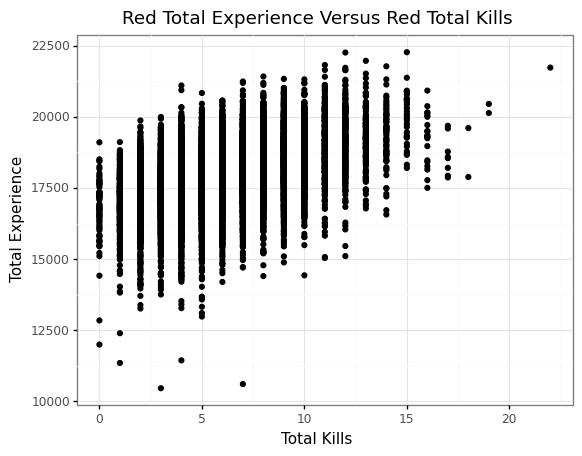

<ggplot: (107443994871)>

In [83]:
(ggplot(df2, aes(x = 'redKills', y = 'redTotalExperience')) + geom_point() + 
theme_minimal() + theme_bw() + ggtitle('Red Total Experience Versus Red Total Kills') + 
labs(x = 'Total Kills', y = 'Total Experience'))

C:\Users\Isaac Min\AppData\Local\Temp\ipykernel_11920\3721598948.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[0.2874095986808254, 0.27388344471984544, 0.27024777463889543, 0.2624906571990646, 0.2476841478770685, 0.2557012992190739, 0.24251904821279288, 0.22740348362002596, 0.22701504891317315, 0.2096690500264334, 0.20588172353057377, 0.2191488607022751, 0.2135952583111777]


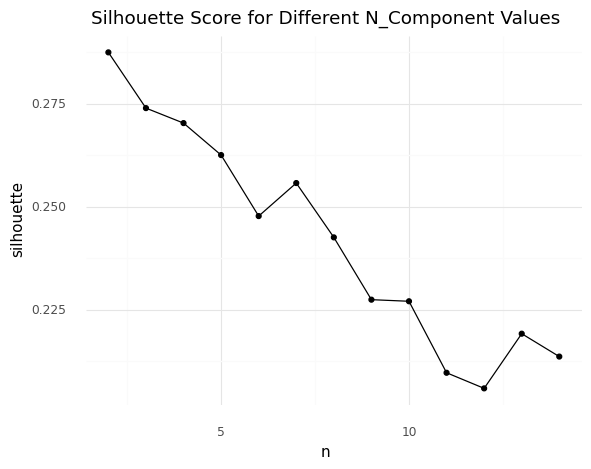

<ggplot: (107446855702)>

In [84]:
features = ['redTotalMinionsKilled', 'redTotalExperience', 'redKills']

X = df2[features]

# z-scoring
z = StandardScaler()
X[features] = z.fit_transform(X)
Xdf = X

# finding the best n_components value
sils = []
n_components = [2,3,4,5,6,7,8,9,10,11,12,13,14]

for n in n_components:
    gmm = GaussianMixture(n_components = n)
    gmm.fit(X)
    pred = gmm.predict(X)

    sils.append(silhouette_score(X, pred))

print(sils)

# saving silhouette scores and n_components to dataframe 
sils_df = pd.DataFrame({"n": n_components,
                      "silhouette": sils})

#plot
(ggplot(sils_df, aes(x = "n", y = "silhouette")) + geom_point() + geom_line() + 
theme_minimal() + labs(title = "Silhouette Score for Different N_Component Values"))

In [85]:
EM = GaussianMixture(n_components = 2)
EM.fit(X)

EMcluster2 = EM.predict(X)
X['EM_Clusters'] = EMcluster2
print(silhouette_score(X, EMcluster2))

C:\Users\Isaac Min\AppData\Local\Temp\ipykernel_11920\3225884027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.35107508727877745


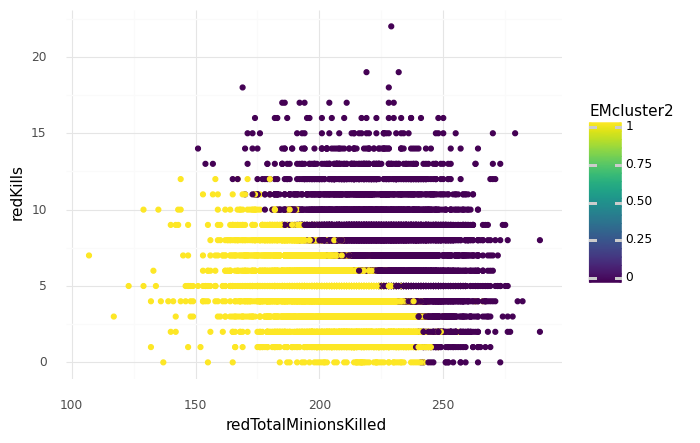

<ggplot: (107444134545)>

In [90]:
(ggplot(df2, aes(x = 'redTotalMinionsKilled', y = 'redKills', color = 'EMcluster2')) 
+ geom_point() + theme_minimal())



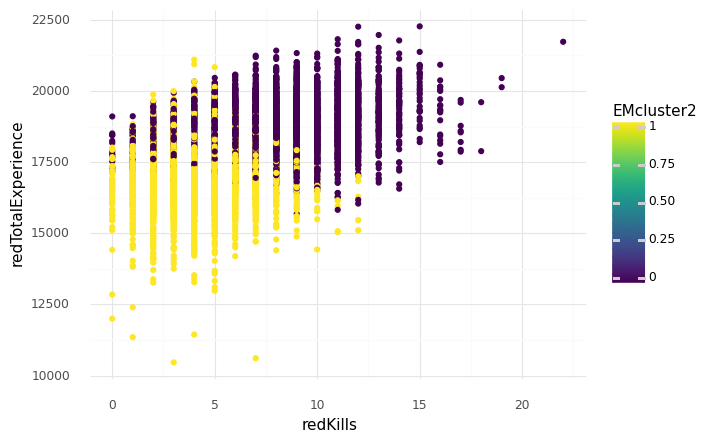

<ggplot: (107439794378)>

In [91]:
(ggplot(df2, aes(x= 'redKills', y= 'redTotalExperience', color = 'EMcluster2')) 
+ geom_point() + theme_minimal())

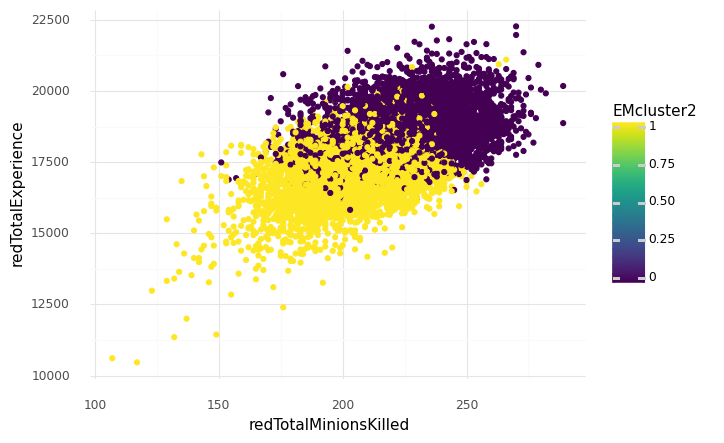

<ggplot: (107443263982)>

In [92]:
(ggplot(df2, aes(x = 'redTotalMinionsKilled', y = 'redTotalExperience', color = 'EMcluster2')) 
+ geom_point() + theme_minimal())


### 3.

I was interested in seeing if there were clusters that emerged between the total minions killed, number of kills, and total experience for both the blue and red teams. Scatterplots were created that compared each of these parameters within each team to evaluate which clustering method (KMeans, Gaussian Mixture Models (EM), DBSCAN, or Hierarchial Clustering) would be appropriate. However, upon evaluation of these scatterplots, I found that there were no visually obvious clusters that emerged. Each scatterplot created comparing each of the variables had one main cluster, with a few outliers. 

When examining the generated scatterplots (for both teams), I believed that **Gaussian Mixture Models (EM)** would be the most appropriate clustering method. Gaussian Mixture Models (EM) is an algorithm that calculates the probability of a data point beloning to a cluster (probabilistic assignment). I opted to use this algorithim because the scatterplots generally seemed to take on an elliptical shape. **KMeans** was not used because the assumptions associated with this algorithm were not fulfilled: 1. there exists spherical clusters in the dataset and 2. there are roughly the same number of points in each cluster. **DBSCAN** was not used because this algorithm performs poorly with high dimensional data. Our dataset contained 38 features, which made using DBSCAN inappropriate. **Agglomerative Hierarchial Clustering** was not used because there did not seem to be a clear hierachy between each of the selected features.

When evaluating the clusters that the EM algorithm created, different clusters emerged for the different teams. In both teams, each scatterplot had different colors in the middle of the visual cluster. With these visuals, I determined that clustering in general may be poor for the selected parameters due to the low silhouette score. The silhouette score of the blue team was approximately 0.363 while the silhouette score of the red team was approximately 0.351. This indicates that there was poor separation and cohesion between the features. This evaluation indicated that the chosen parameters or this dataset may be a poor choice for clustering methods such as Gasussian Mixture Models (EM).
